<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B5%90%EA%B3%BC%EC%84%9C_ch5_1p_166~179.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.1 합성곱 신경망

* 역전파(Backpropagation)

  * 순전파 과정에서 계산된 오차를 출력층 → 은닉층 → 입력층으로 전파하며 가중치를 조정함
  * 계산이 복잡하고, 많은 자원(CPU, GPU, 메모리)이 필요하며, 시간도 오래 걸림

* 합성곱 신경망(Convolutional Neural Network, CNN)

  * 이미지를 전체적으로 계산하지 않고, 국소적(local) 영역만 계산
  * 연산 자원을 절약하고, 세밀한 특징까지 분석 가능
  * 이미지 처리에 효율적이고 강력한 구조

## 5.1.1 합성곱층의 필요성


* CNN : 이미지나 영상 처리에 유용한 신경망 구조

* 예시:

  * 3×3 흑백(그레이스케일) 이미지에서 각 픽셀에 가중치를 곱해 펼치는(flattening)방식으로 은닉층에 전달 가능함
  * 하지만 이렇게 하면 이미지의 공간적 구조(위치 정보 등)를 무시하게 됨

* 해결책: 합성곱층(Convolutional Layer)

  * 이미지를 그대로의 형태로 유지한 채 국소적인 특징을 추출
  * 공간 정보를 보존하면서도 효과적으로 학습 가능

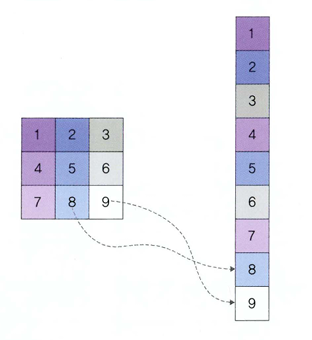

## 5.1.2 합성곱 신경망 구조

1. 입력층(Input Layer)
- 딥러닝 모델, 특히 이미지 인식과 관련된 신경망에서 입력 데이터가 처음으로 들어가는 계층
- 역할 : 이 계층은 실제 연산을 하진 않지만, 모델이 데이터를 인식하고 처리할 수 있도록 형태를 정의


입력층의 특징:

 - 데이터 형태 유지

   이미지 데이터는 일반적으로 (높이, 너비, 채널)과 같은 3차원 구조를 가짐

   * 예: 흑백(그레이스케일) 이미지는 채널이 1
   * 예: 컬러(RGB) 이미지는 채널이 3

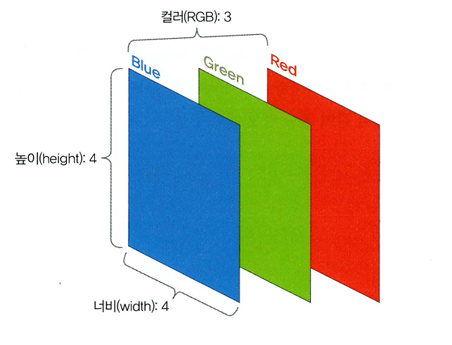



2. 합성곱층(convolutional layer)

스트라이드가1일 때 이동하는과정


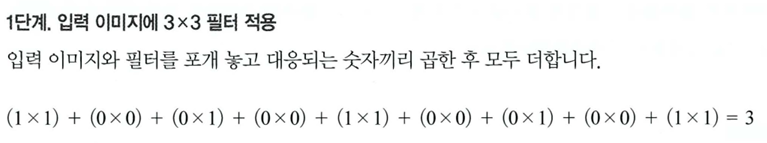

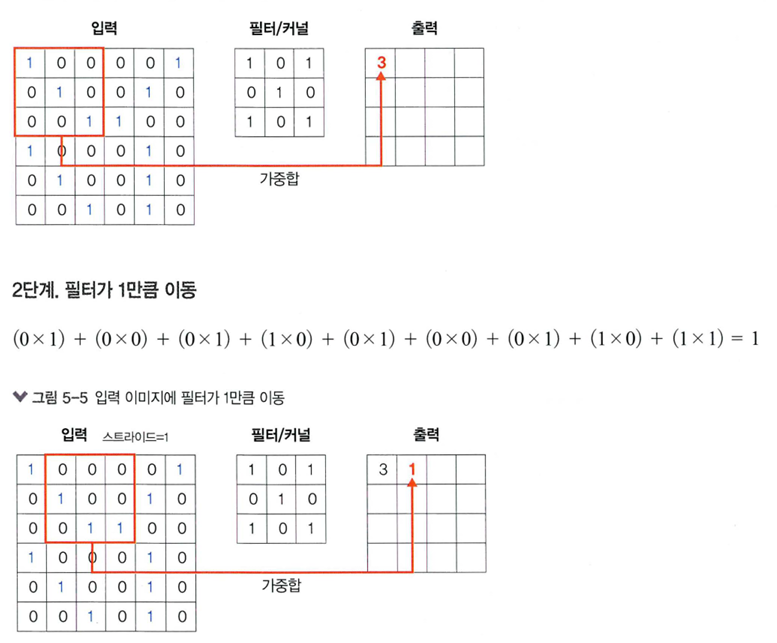

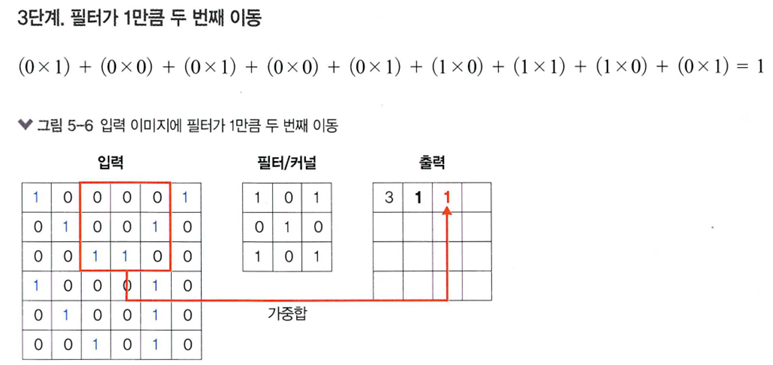

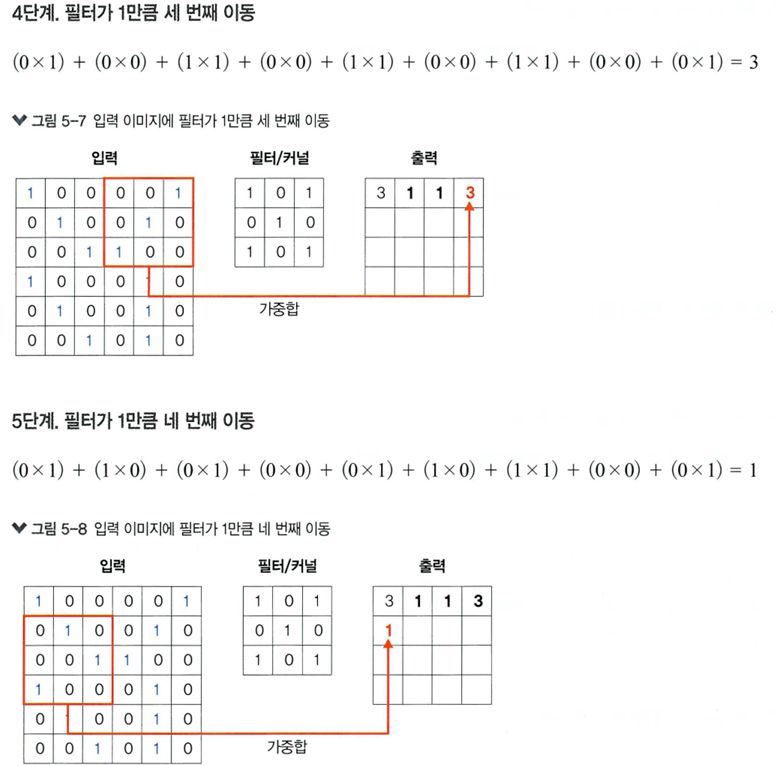

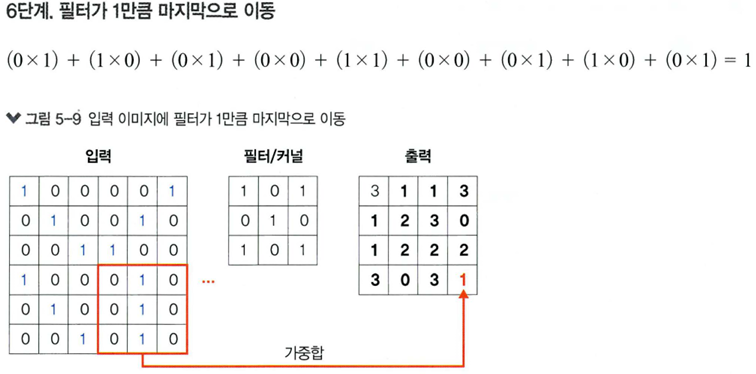

컬러 이미지 합성곱

* RGB 이미지의 필터는 채널이 3개여서, R/G/B 각각에 합성곱 후 결과를 더함
* 필터 개수는 1개이고, 스트라이드 등 연산 방식은 동일함

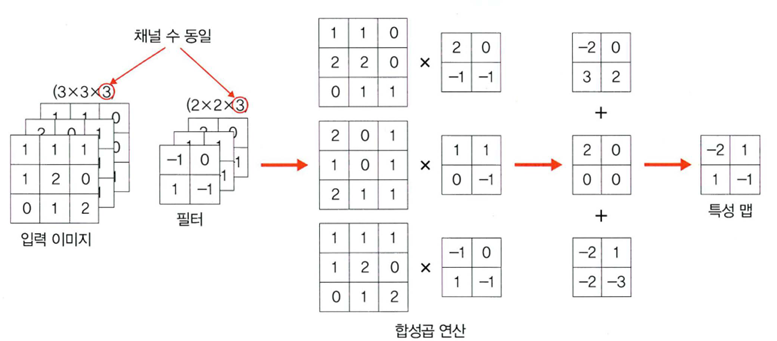


필터가 두 개 이상인 합성곱

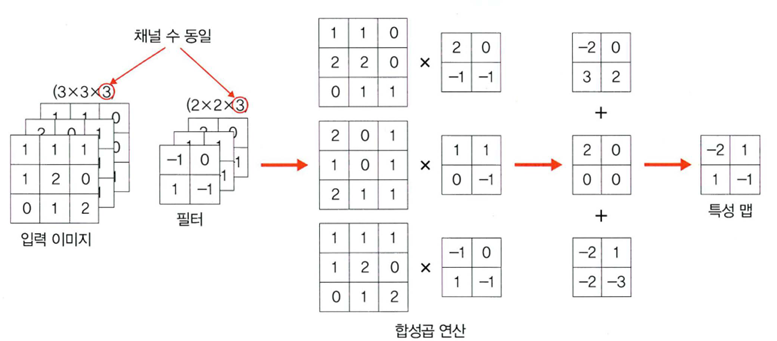

(요약)

- **입력 데이터**: $W_1 \times H_1 \times D_1$

- **하이퍼파라미터**:
  - 필터 크기: $F$
  - 스트라이드: $S$
  - 패딩: $P$
  - 필터 개수: $K$

- **출력 데이터**:
  - 가로 크기:
  $$W_2 = \frac{W_1 - F + 2P}{S} + 1$$
  - 세로 크기:
  $$H_2 = \frac{H_1 - F + 2P}{S} + 1$$
  - 채널 수:
  $$D_2 = K$$



3. 풀링층

- 합성곱층과 비슷하게 특징 맵의 크기를 줄여 연산량을 감소시키고, 중요한 특징을 추출해 학습 효율을 높임

주요 두 가지 풀링:

* **최대 풀링 (max pooling)**: 영역 내 최댓값을 선택
* **평균 풀링 (average pooling)**: 영역 내 값들의 평균을 계산

하지만 대부분의 합성곱 신경망에서는 최대 풀링을 사용 -> 평균 풀링이 중요한 특징의 강도를 희석시킬 수 있기 때문


(연산 과정)

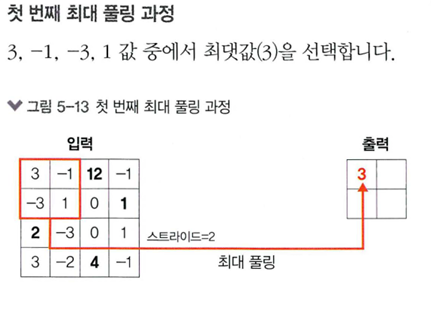

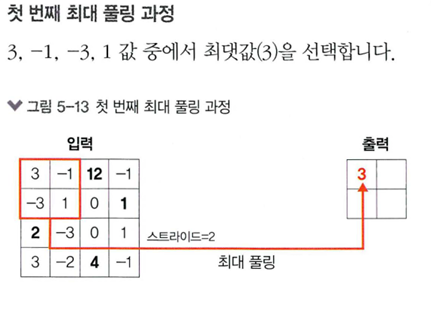

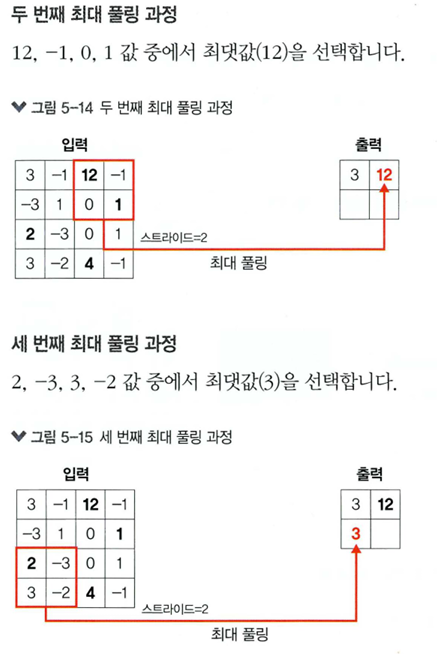

평균 풀링(각 필터의 평균으로 계산) vs 최대 풀링

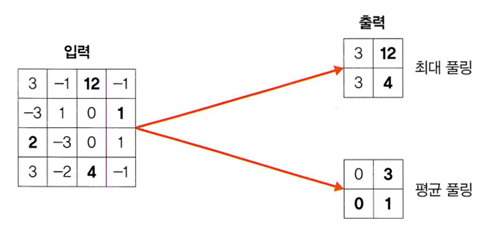

(요약)

- **입력 데이터**: $W_1 \times H_1 \times D_1$

- **하이퍼파라미터**:
  - 필터 크기: $F$
  - 스트라이드: $S$

- **출력 데이터**:
  - 가로 크기:  
  $$W_2 = \frac{W_1 - F}{S} + 1$$
  
  - 세로 크기:  
  $$H_2 = \frac{H_1 - F}{S} + 1$$
  
  - 채널 수:  
  $$D_2 = D_1$$


4. 완전연결층

- 합성곱층과 풀링층을 거치면서 축소된 특성 맵은 최종적으로 완전연결층으로 전달됨
- 이미지는 3차원 -> 1차원 벡터로 펼쳐짐

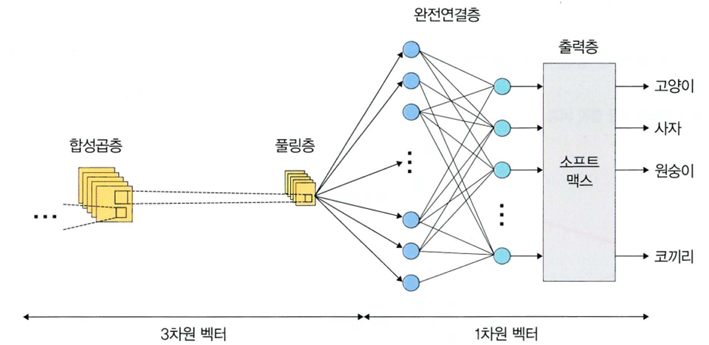

5. 출력층

- 출력층에서는 소프트맥스 함수를 사용해 각 레이블에 속할 확률을 0~1 사이 값으로 변환
- 가장 높은 확률을 가진 레이블이 최종 분류 결과

## 5.1.3 1D, 2D, 3D 합성곱

### 1D 합성곱

* 1D 합성곱: 필터가 시간 축으로만 이동
* 입력과 필터 합성곱 → 1차원 출력
* 예: 입력 \[1,1,1,1,1], 필터 \[0,0.5,0.25] → 출력 \[1,1,1]
* 그래프 곡선 완화에 사용

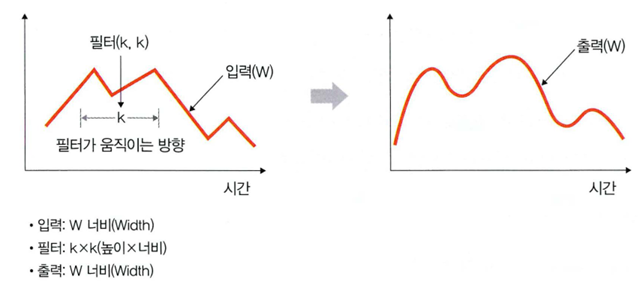

### 2D 합성곱
- 2D 합성곱은 필터가 다음 그림과 같이 방향 두 개로 움직이는 형태
- 즉, 입력(W, H)과 필터(k, k)에 대한 출력은 (W, H)가 되며 출력 형태는 2D 행렬이 됨

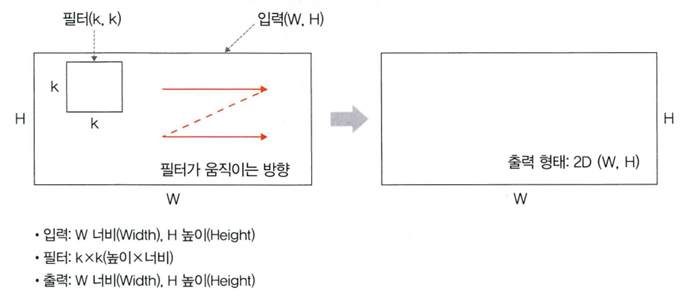

### 3D 합성곱

- 3D 합성곱: 필터가 3차원 방향으로 이동  
- 입력 크기: $(W, H, L)$  
- 필터 크기: $(k, k, d)$  
- 출력 크기: $(W, H, L)$  
- 조건: $d < L$ 유지

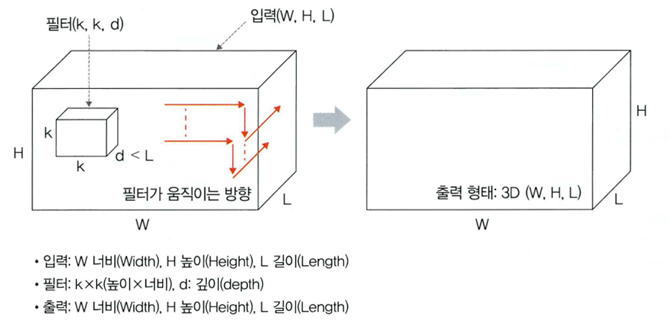



### 3D 입력을 갖는 2D 합성곱

- 입력 크기: $(W, H, L)$  
- 필터 크기: $(k, k, L)$ (입력 채널 수와 동일)  
- 출력 크기: $(W, H)$ (2D 행렬)  
- 필터는 두 방향으로만 움직임  
- 대표 사례: LeNet-5, VGG  

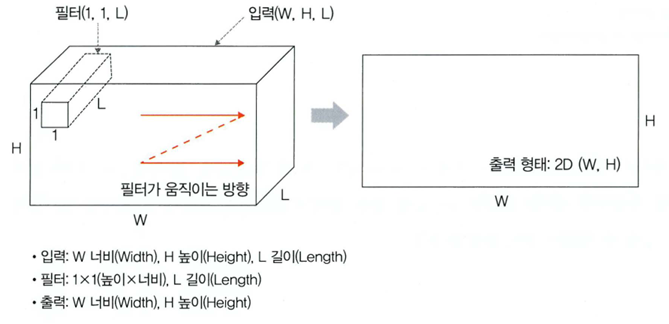

### 1 X 1 합성곱

- 필터 크기: $(1, 1, L)$  
- 출력 크기: $(W, H)$  
- 채널 수 조절로 연산량 감소 효과  
- 대표 사례: GoogLeNet

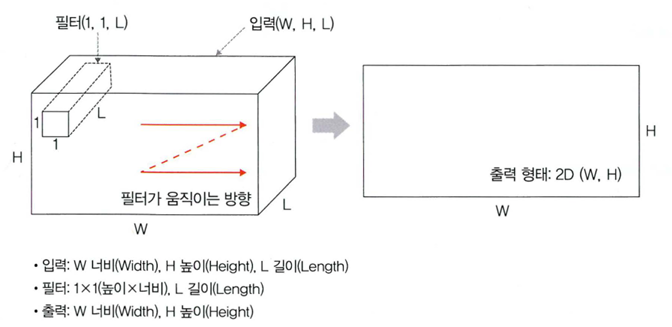